<a href="https://colab.research.google.com/github/Smagali/Portfolio/blob/main/Topes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/PAMI TRABAJO/topes/"

archivos = [
    path + "AGOSTO.xls.xlsx",
    path + "SEPTIEMBRE.xls.xlsx",
    path + "OCTUBRE.xls.xlsx",
    path + "noviembre.xlsx",
    path + "DICIEMBRE.xls.xlsx"
]

dfs = [pd.read_excel(a) for a in archivos]




In [14]:
meses = ["Mes1", "Mes2", "Mes3", "Mes4", "Mes5"]

for df, mes in zip(dfs, meses):
    df["MES"] = mes

data = pd.concat(dfs, ignore_index=True)


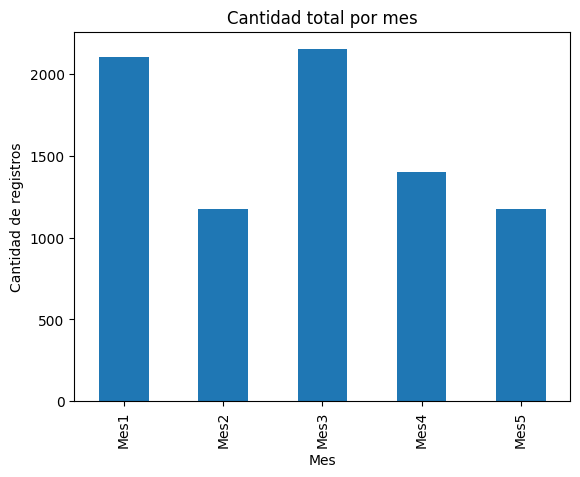

In [15]:
conteo = data.groupby("MES").size()

conteo.plot(kind="bar")
plt.title("Cantidad total por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de registros")
plt.show()


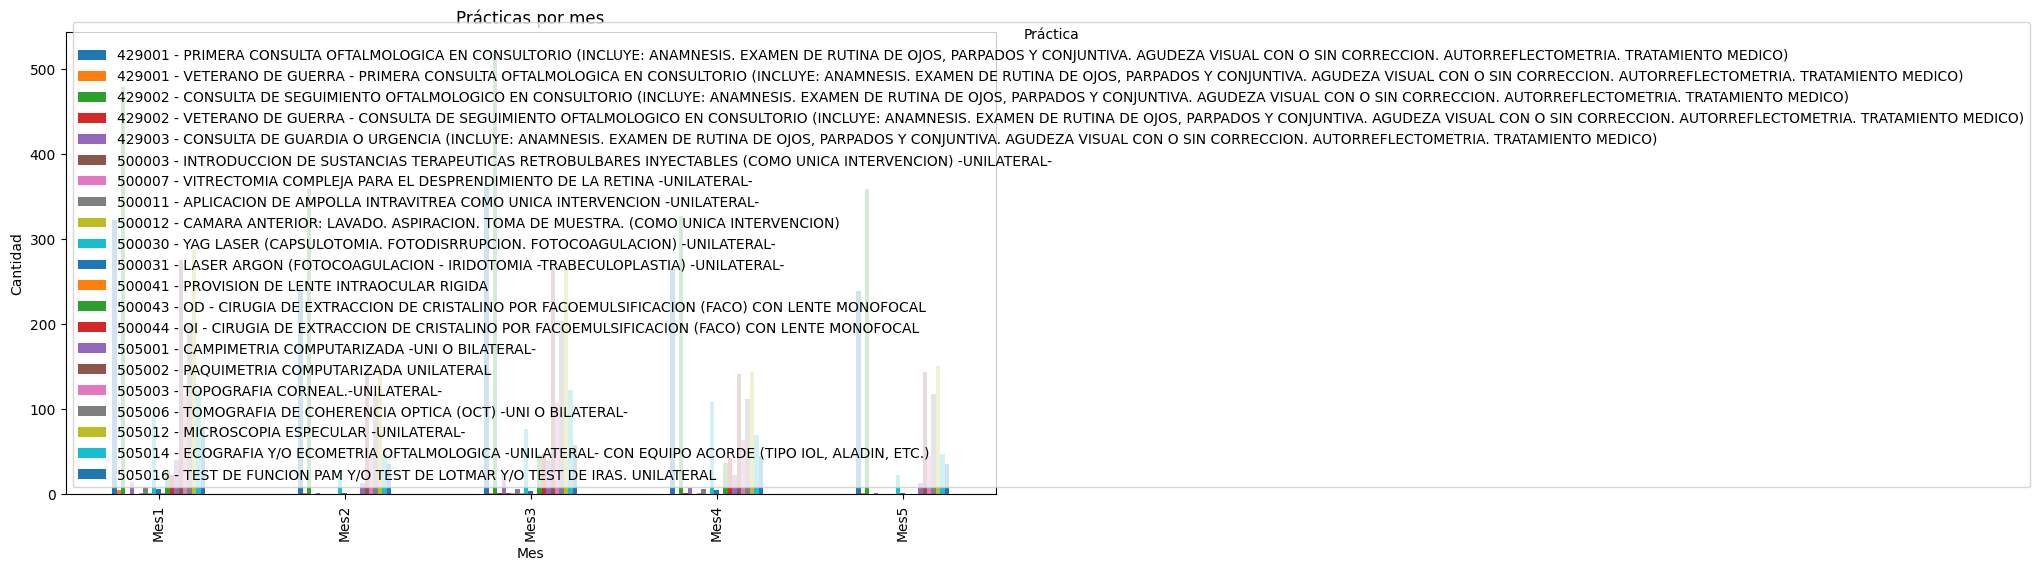

In [16]:
conteo_practica = data.groupby(["MES", "PRÁCTICA"]).size().unstack()

conteo_practica.plot(kind="bar", figsize=(12,6))
plt.title("Prácticas por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.legend(title="Práctica")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


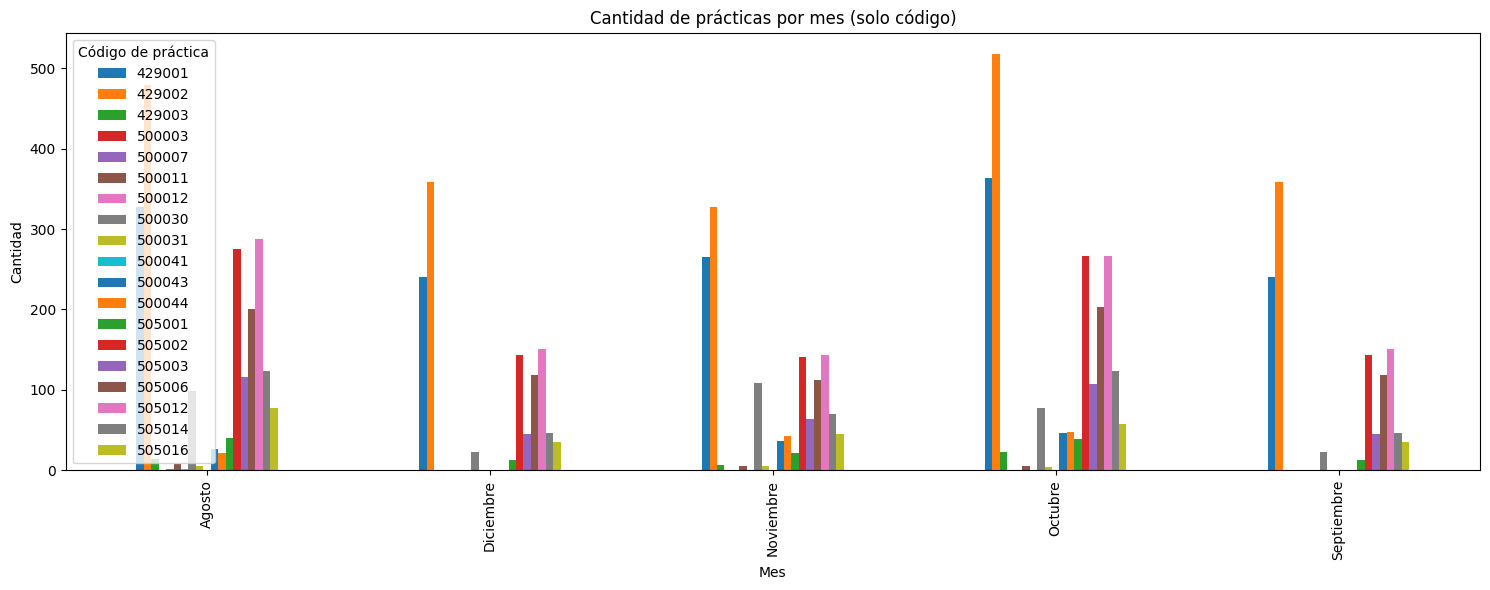

In [18]:
# ==========================================
# 1) Montar Drive
# ==========================================
from google.colab import drive
drive.mount('/content/drive')

# ==========================================
# 2) Librerías
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
import os

# ==========================================
# 3) Rutas y nombres de archivos
# Cambia los nombres según tu os.listdir()
# ==========================================
path = "/content/drive/MyDrive/PAMI TRABAJO/topes/"

archivos = {
    "Agosto":      "AGOSTO.xls.xlsx",
    "Septiembre":  "SEPTIEMBRE.xls.xlsx",
    "Octubre":     "OCTUBRE.xls.xlsx",
    "Noviembre":   "noviembre.xlsx",
    "Diciembre":   "DICIEMBRE.xls.xlsx"
}

# ==========================================
# 4) Cargar cada archivo y agregar columna MES
# ==========================================
dataframes = []

for mes, archivo in archivos.items():
    df = pd.read_excel(path + archivo)
    df["MES"] = mes
    dataframes.append(df)

# Unir todo
data = pd.concat(dataframes, ignore_index=True)

# ==========================================
# 5) Extraer solo el código numérico de la PRÁCTICA
# ==========================================
data["CODIGO_PRACTICA"] = data["PRÁCTICA"].str.extract(r"(\d+)")

# ==========================================
# 6) Graficar cantidad de prácticas por mes
# ==========================================
conteo = data.groupby(["MES", "CODIGO_PRACTICA"]).size().unstack()

conteo.plot(kind="bar", figsize=(15,6))
plt.title("Cantidad de prácticas por mes (solo código)")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.legend(title="Código de práctica")
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import plotly.express as px
data["CODIGO_PRACTICA"] = data["PRÁCTICA"].str.extract(r"(\d+)")


In [21]:
codigos_1 = ["429001", "429002", "429003"]

df1 = data[data["CODIGO_PRACTICA"].isin(codigos_1)]

conteo1 = df1.groupby(["MES", "CODIGO_PRACTICA"]).size().reset_index(name="CANTIDAD")

fig1 = px.bar(
    conteo1,
    x="MES",
    y="CANTIDAD",
    color="CODIGO_PRACTICA",
    barmode="group",
    title="Comparativo mensual – Códigos 429001, 429002, 429003",
    hover_data=["CANTIDAD"]
)

fig1.show()


In [22]:
codigos_2 = ["500007", "500011", "500012", "500030", "500031", "500043", "500044"]

df2 = data[data["CODIGO_PRACTICA"].isin(codigos_2)]

conteo2 = df2.groupby(["MES", "CODIGO_PRACTICA"]).size().reset_index(name="CANTIDAD")

fig2 = px.bar(
    conteo2,
    x="MES",
    y="CANTIDAD",
    color="CODIGO_PRACTICA",
    barmode="group",
    title="Comparativo mensual – Códigos 500007, 500011, 500012, 500030, 500031, 500043, 500044",
    hover_data=["CANTIDAD"]
)

fig2.show()


In [23]:
codigos_3 = ["50516", "505014", "505012", "505006", "505003", "505002", "505001"]

df3 = data[data["CODIGO_PRACTICA"].isin(codigos_3)]

conteo3 = df3.groupby(["MES", "CODIGO_PRACTICA"]).size().reset_index(name="CANTIDAD")

fig3 = px.bar(
    conteo3,
    x="MES",
    y="CANTIDAD",
    color="CODIGO_PRACTICA",
    barmode="group",
    title="Comparativo mensual – Códigos 50516, 505014, 505012, 505006, 505003, 505002, 505001",
    hover_data=["CANTIDAD"]
)

fig3.show()


In [25]:
codigos_mod36 = ["429001", "429002", "429003"]

df_mod36 = data[data["CODIGO_PRACTICA"].isin(codigos_mod36)]
df_mod36["MODULO"] = "36"

conteo_mod36 = df_mod36.groupby(["MES", "MODULO"]).size().reset_index(name="CANTIDAD")

fig_mod36 = px.bar(
    conteo_mod36,
    x="MES",
    y="CANTIDAD",
    title="Módulo 36 – Total mensual (429001 + 429002 + 429003)",
    hover_data=["CANTIDAD"],
    text="CANTIDAD"
)

fig_mod36.update_traces(textposition="outside")
fig_mod36.show()


/tmp/ipython-input-1912794230.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
codigos_mod38 = ["500007", "500011", "500012", "500030", "500031", "500043", "500044"]

df_mod38 = data[data["CODIGO_PRACTICA"].isin(codigos_mod38)]
df_mod38["MODULO"] = "38"

conteo_mod38 = df_mod38.groupby(["MES", "MODULO"]).size().reset_index(name="CANTIDAD")

fig_mod38 = px.bar(
    conteo_mod38,
    x="MES",
    y="CANTIDAD",
    title="Módulo 38 – Total mensual (códigos 5000xx)",
    hover_data=["CANTIDAD"],
    text="CANTIDAD"
)

fig_mod38.update_traces(textposition="outside")
fig_mod38.show()


/tmp/ipython-input-135013294.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
codigos_mod37 = ["50516", "505014", "505012", "505006", "505003", "505002", "505001"]

df_mod37 = data[data["CODIGO_PRACTICA"].isin(codigos_mod37)]
df_mod37["MODULO"] = "37"

conteo_mod37 = df_mod37.groupby(["MES", "MODULO"]).size().reset_index(name="CANTIDAD")

fig_mod37 = px.bar(
    conteo_mod37,
    x="MES",
    y="CANTIDAD",
    title="Módulo 37 – Total mensual (códigos 505xx)",
    hover_data=["CANTIDAD"],
    text="CANTIDAD"
)

fig_mod37.update_traces(textposition="outside")
fig_mod37.show()


/tmp/ipython-input-2004376448.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

# Paleta PAMI para 5 meses
colores_pami = ["#0057A6", "#197EC8", "#47C7EA", "#F7C600", "#FFD540"]

# Asegurar que MES sea categórico para asignar colores por mes
conteo_mod36["MES"] = conteo_mod36["MES"].astype("category")
conteo_mod38["MES"] = conteo_mod38["MES"].astype("category")
conteo_mod37["MES"] = conteo_mod37["MES"].astype("category")

# Crear figura con subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Módulo 36 – Códigos 429001 / 429002 / 429003",
        "Módulo 38 – Varios códigos",
        "Módulo 37 – Varios códigos"
    ),
    specs=[[{"colspan": 2}, None],
           [{}, {}]]
)

# --- MÓDULO 36 ---
fig_mod36 = px.bar(
    conteo_mod36,
    x="MES", y="CANTIDAD", color="MES",
    color_discrete_sequence=colores_pami,
    text="CANTIDAD"
)

for trace in fig_mod36.data:
    fig.add_trace(trace, row=1, col=1)

# --- MÓDULO 38 ---
fig_mod38 = px.bar(
    conteo_mod38,
    x="MES", y="CANTIDAD", color="MES",
    color_discrete_sequence=colores_pami,
    text="CANTIDAD"
)

for trace in fig_mod38.data:
    fig.add_trace(trace, row=2, col=1)

# --- MÓDULO 37 ---
fig_mod37 = px.bar(
    conteo_mod37,
    x="MES", y="CANTIDAD", color="MES",
    color_discrete_sequence=colores_pami,
    text="CANTIDAD"
)

for trace in fig_mod37.data:
    fig.add_trace(trace, row=2, col=2)

# Ajustes generales
fig.update_traces(textposition="outside")
fig.update_layout(
    height=900,
    width=1100,
    showlegend=True,
    title_text="Comparativo Mensual por Módulo – Paleta PAMI",
    title_x=0.5
)

fig.show()
